In [1]:
# MODEL = "meta-llama/Llama-2-7b-hf"
MODEL = "meta-llama/Meta-Llama-3.1-8B"

In [2]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/edenn-evals")

# Placeholder for confusion matrix values
mses, ppls, bitwidhts = [], [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    mse = run.summary.get("expected_mse")
    ppl = run.summary.get("wikitext2_PPL")
    bitwidht = run.summary.get("bitwidth")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name.split(",")[0].split("=")[1][1:-1] == MODEL:
        mses.append(mse)
        ppls.append(ppl)
        bitwidhts.append(bitwidht)
        
mses = np.asarray(mses)
ppls = np.asarray(ppls)
bitwidhts = np.asarray(bitwidhts)

In [ ]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/edenn-gptq")

# Placeholder for confusion matrix values
gptq_mses, gptq_ppls, gptq_bitwidhts = [], [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    mse = run.summary.get("expected_mse")
    ppl = run.summary.get("wikitext2_PPL")
    bitwidht = run.summary.get("bitwidth")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name.split(",")[0].split("=")[1][1:-1] == MODEL:
        gptq_mses.append(mse)
        gptq_ppls.append(ppl)
        gptq_bitwidhts.append(bitwidht)
        
gptq_mses = np.asarray(gptq_mses)
gptq_ppls = np.asarray(gptq_ppls)
gptq_bitwidhts = np.asarray(gptq_bitwidhts)

In [ ]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/NOISY_MSE_GALQIWI")

# Placeholder for confusion matrix values
noisy_mses, noisy_ppls = [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    mse = run.summary.get("relative_mse")
    ppl = run.summary.get("wikitext2")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name == MODEL.split("/")[-1]:
        noisy_mses.append(float(mse))
        noisy_ppls.append(float(ppl))

noisy_mses = np.asarray(noisy_mses)
noisy_ppls = np.asarray(noisy_ppls)

Text(0.5, 1.0, 'meta-llama/Meta-Llama-3.1-8B')

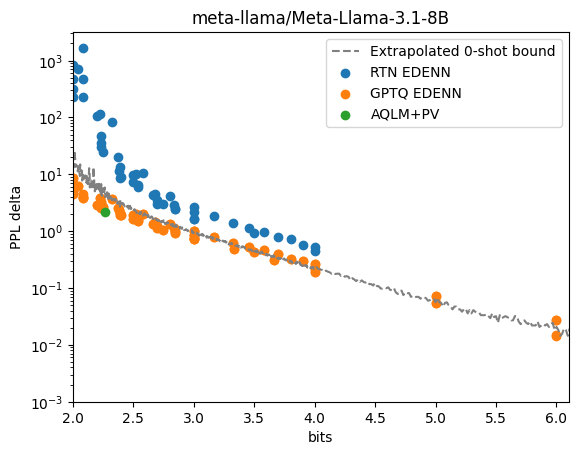

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# t_bitwidhts = - np.log2(mses) / 2
# t_bitwidths_order = np.argsort(t_bitwidhts)
# plt.plot(
#     t_bitwidhts[t_bitwidths_order], ppls[t_bitwidths_order] - np.min(ppls),
#     color="black", linestyle="--", label="Extrapolated 0-shot bound",
# )

noisy_bitwidhts = - np.log2(noisy_mses) / 2
noisy_bitwidhts_order = np.argsort(noisy_bitwidhts)
plt.plot(
    noisy_bitwidhts[noisy_bitwidhts_order], noisy_ppls[noisy_bitwidhts_order] - np.min(ppls),
    color="gray", linestyle="--", label="Extrapolated 0-shot bound",
)


plt.scatter(
    bitwidhts, ppls - np.min(ppls),
    label="RTN EDENN",
)

plt.scatter(
    gptq_bitwidhts, gptq_ppls - np.min(ppls),
    label="GPTQ EDENN",
)

if MODEL == "meta-llama/Meta-Llama-3.1-8B":
    plt.scatter(
        [2.27], [7.75 - np.min(ppls)],
        label="AQLM+PV",
    )
elif MODEL == "meta-llama/Llama-2-7b-hf":
    plt.scatter(
        [2.02, 2.29], [5.84 - np.min(ppls), 5.678532600402832 - np.min(ppls)],
        label="AQLM+PV",
    )
    plt.scatter(
        [2.02, 2.29, 3.04, 4.04], [6.688191890716553 - np.min(ppls), 5.922969818115234 - np.min(ppls), 5.46 - np.min(ppls), 5.21 - np.min(ppls)],
        label="AQLM",
    )
    plt.scatter(
        [2.00, 3.00, 4.00], [5.91 - np.min(ppls), 5.29 - np.min(ppls), 5.17 - np.min(ppls)],
        label="QTIP",
    )

plt.yscale("log")
plt.xlim(2, 6.1)
plt.ylim(10**-3, 10**3.5)

plt.xlabel("bits")
plt.ylabel("PPL delta")
plt.legend()
plt.title(MODEL)

In [ ]:
print(np.min(ppls))

5.606886386871338


In [1]:
# MODEL = "meta-llama/Llama-2-7b-hf"
MODEL = "meta-llama/Meta-Llama-3.1-8B"

import wandb
import numpy as np
from tqdm.auto import tqdm

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/NOISY_MSE_ONE_LAYER_GALQIWI_PPL")

# Placeholder for confusion matrix values
mses, ppls, bitwidhts, layer_ids = [], [], [], []

# Iterate over runs and extract confusion matrix data
for run in tqdm(project_runs):
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.config.get("base_model")
    mse = run.summary.get("relative_mse")
    ppl = run.summary.get("wikitext2")
    bitwidht = run.summary.get("effective_wbits")
    layer_id = run.config.get("layer_idx")
    
    # print(f"{model=} {layer_id=} {mse=} {ppl=}")
    if mse is not None and ppl is not None:
        mses.append(mse)
        ppls.append(ppl)
        bitwidhts.append(bitwidht)
        layer_ids.append(layer_id)
        
mses = np.asarray(mses)
ppls = np.asarray(ppls)
bitwidhts = np.asarray(bitwidhts)
layer_ids = np.asarray(layer_ids)

order = np.argsort(mses)
mses = mses[order]
ppls = ppls[order]
bitwidhts = bitwidhts[order]
layer_ids = layer_ids[order]

  0%|          | 0/8494 [00:00<?, ?it/s]

Text(0, 0.5, 'PPL')

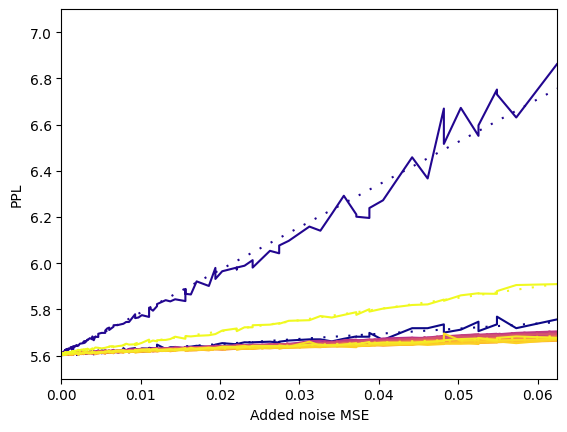

In [62]:
from scipy.stats import linregress

import matplotlib.pyplot as plt
import matplotlib as mpl

slopes = np.empty((32,))

cmap = mpl.colormaps["plasma"]

for layer_id in range(32):
    this_layer_pos = (layer_ids == layer_id)
    
    plt.plot(
        mses[this_layer_pos],
        ppls[this_layer_pos],
        label=f"{layer_id}",
        color=cmap(layer_id/31),
    )
    
    this_layer_pos = (layer_ids == layer_id) & (mses <= 4**(-2))
    fit = linregress(mses[this_layer_pos], ppls[this_layer_pos])
    
    plt.plot(
        np.linspace(0, 4**(-2)),
        fit.intercept + fit.slope * np.linspace(0, 4**(-2)),
        color=cmap(layer_id/31),
        linestyle=(0, (1, 5)),
    )
    slopes[layer_id] = fit.slope

    # plt.yscale("log")

plt.xlim(0, 4**(-2))
plt.ylim(5.5, 7.1)

plt.xlabel("Added noise MSE")
plt.ylabel("PPL")

Text(0.5, 1.0, 'Optimal block-wise BPW, meta-llama/Meta-Llama-3.1-8B')

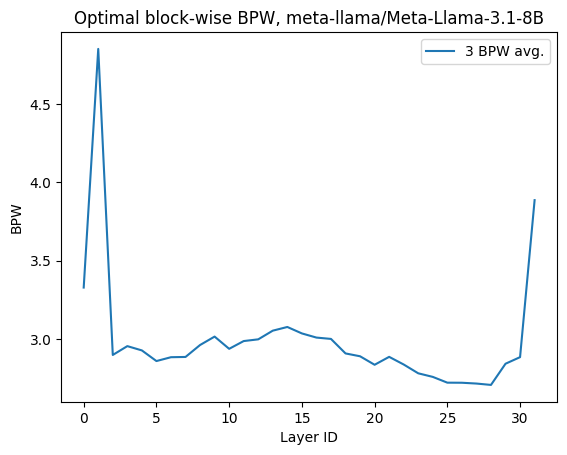

In [91]:
from scipy.optimize import minimize

def expected_ppl_gap(slopes, allocated_bitwidths, budget):
    allocated_bitwidths[0] = budget - np.sum(allocated_bitwidths[1:])

    return np.sum(slopes * np.power(4, -allocated_bitwidths))


for budget in (3,):
    res = minimize(
        lambda allocated_bitwidths: expected_ppl_gap(slopes, allocated_bitwidths, budget * 32),
        np.ones_like(slopes) * budget,
    )

    res.x[0] = budget * 32 - np.sum(res.x[1:])
    plt.plot(res.x, label=f"{budget} BPW avg.")
    
    
plt.xlabel("Layer ID")
plt.ylabel("BPW")

plt.legend()
plt.title(f"Optimal block-wise BPW, {MODEL}")

In [89]:
expected_optimal_ppl_gap = res.fun

print(f"Expected optimal PPL: {(np.min(ppls) + expected_optimal_ppl_gap):0.3f}")

Expected optimal PPL: 6.310


In [92]:
res.x

array([3.32765888, 4.85262624, 2.8969397 , 2.95337116, 2.9259439 ,
       2.85794921, 2.88254767, 2.88417469, 2.96046389, 3.01430226,
       2.93614546, 2.98572983, 2.99676487, 3.05219574, 3.07573614,
       3.03453164, 3.00801465, 2.99944744, 2.90671208, 2.88851948,
       2.83419149, 2.88483274, 2.83588925, 2.77966972, 2.75675505,
       2.71986931, 2.71934992, 2.71420132, 2.70544881, 2.84081561,
       2.88296983, 3.886232  ])